<a href="https://www.kaggle.com/code/mikedelong/yes-there-are-ugly-pie-charts?scriptVersionId=138717278" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
drop_columns = ['CRASH_RECORD_ID', 'CRASH_DATE_EST_I',
                'NOT_RIGHT_OF_WAY_I', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I',
                'LANE_CNT', 'LOCATION', 
               ]
nrows = 100000 # for performance reasons we take samples
filepath_or_buffer='../input/chicago-car-crash-dataset/Traffic_Crashes_-_Crashes.csv'
df = pd.read_csv(filepath_or_buffer=filepath_or_buffer, 
                 nrows=nrows, 
                 parse_dates=['CRASH_DATE', 'DATE_POLICE_NOTIFIED'], 
                ).drop(columns=drop_columns)

df.sample(n=7)

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
84277,HZ291617,2016-06-03 08:15:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,0.0,0.0,1.0,0.0,8,6,6,41.779285,-87.602715
52374,JA350791,2017-07-14 23:21:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,ONE-WAY,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,5.0,0.0,23,6,7,41.896721,-87.629923
7201,JE246953,2021-05-29 15:35:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,CENTER TURN LANE,STRAIGHT AND LEVEL,...,0.0,0.0,1.0,1.0,0.0,15,7,5,41.724075,-87.585303
3689,NaN,2023-07-30 01:32:00,30,STOP SIGN/FLASHER,UNKNOWN,UNKNOWN,UNKNOWN,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,2.0,0.0,1,1,7,41.692760,-87.662821
92144,JC419642,2019-09-04 10:30:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,3.0,0.0,10,4,9,41.903675,-87.624685
35172,JC296548,2019-06-07 18:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,4.0,0.0,2.0,0.0,18,6,6,41.744080,-87.604974
76888,JC423937,2019-09-07 15:15:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,2.0,0.0,15,7,9,41.867539,-87.656554


In [2]:
df.shape

(100000, 38)

We have three quarters of a million rows so we need to be careful when plotting.

In [3]:
df.dtypes

RD_NO                                    object
CRASH_DATE                       datetime64[ns]
POSTED_SPEED_LIMIT                        int64
TRAFFIC_CONTROL_DEVICE                   object
DEVICE_CONDITION                         object
WEATHER_CONDITION                        object
LIGHTING_CONDITION                       object
FIRST_CRASH_TYPE                         object
TRAFFICWAY_TYPE                          object
ALIGNMENT                                object
ROADWAY_SURFACE_COND                     object
ROAD_DEFECT                              object
REPORT_TYPE                              object
CRASH_TYPE                               object
INTERSECTION_RELATED_I                   object
HIT_AND_RUN_I                            object
DAMAGE                                   object
DATE_POLICE_NOTIFIED             datetime64[ns]
PRIM_CONTRIBUTORY_CAUSE                  object
SEC_CONTRIBUTORY_CAUSE                   object
STREET_NO                               

In [4]:
df.isna().sum()

RD_NO                             1669
CRASH_DATE                           0
POSTED_SPEED_LIMIT                   0
TRAFFIC_CONTROL_DEVICE               0
DEVICE_CONDITION                     0
WEATHER_CONDITION                    0
LIGHTING_CONDITION                   0
FIRST_CRASH_TYPE                     0
TRAFFICWAY_TYPE                      0
ALIGNMENT                            0
ROADWAY_SURFACE_COND                 0
ROAD_DEFECT                          0
REPORT_TYPE                       4094
CRASH_TYPE                           0
INTERSECTION_RELATED_I           77100
HIT_AND_RUN_I                    68784
DAMAGE                               0
DATE_POLICE_NOTIFIED                 0
PRIM_CONTRIBUTORY_CAUSE              0
SEC_CONTRIBUTORY_CAUSE               0
STREET_NO                            0
STREET_DIRECTION                     1
STREET_NAME                          0
BEAT_OF_OCCURRENCE                   2
NUM_UNITS                            0
MOST_SEVERE_INJURY       

<Axes: ylabel='Frequency'>

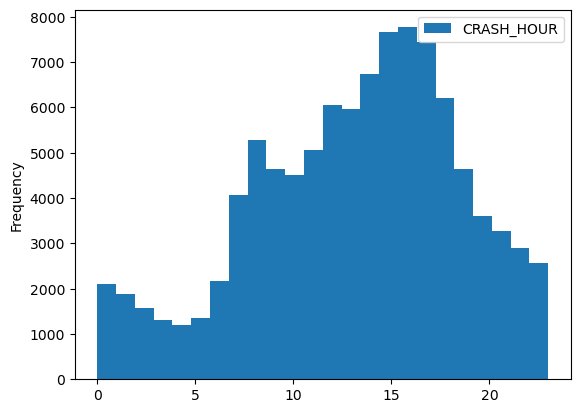

In [5]:
# crashes peak during rush hour
df[['CRASH_HOUR']].plot.hist(bins=24, legend=True)

<Axes: ylabel='Frequency'>

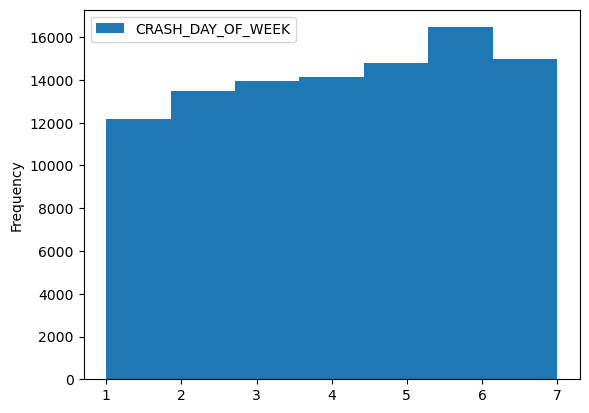

In [6]:
# going to guess 
df[['CRASH_DAY_OF_WEEK']].plot.hist(bins=7, legend=True)

<Axes: ylabel='Frequency'>

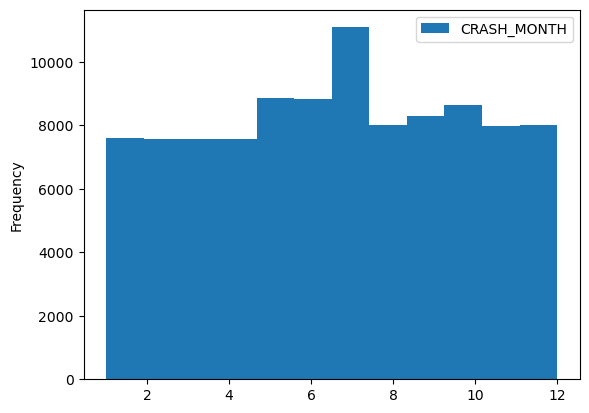

In [7]:
df[['CRASH_MONTH']].plot.hist(bins=12, legend=True)

<Axes: ylabel='INJURIES_TOTAL'>

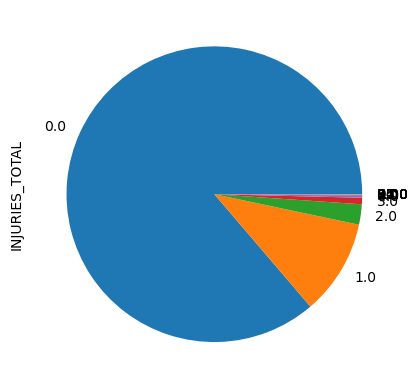

In [8]:
df['INJURIES_TOTAL'].value_counts().plot(kind='pie')

<Axes: ylabel='POSTED_SPEED_LIMIT'>

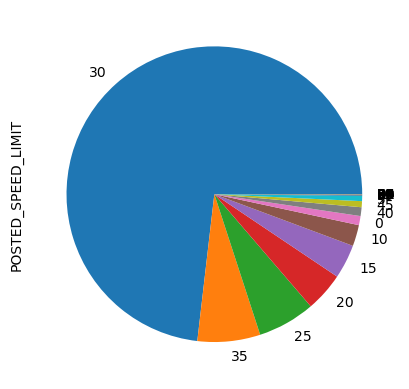

In [9]:
df['POSTED_SPEED_LIMIT'].value_counts().plot(kind='pie')

We have some outliers; are they sensible?

In [10]:
df[(df['POSTED_SPEED_LIMIT'] < 10) | (df['POSTED_SPEED_LIMIT'] > 55)]['POSTED_SPEED_LIMIT'].value_counts()

0     997
5     560
3      24
9      11
60      6
99      5
1       4
65      3
6       1
2       1
Name: POSTED_SPEED_LIMIT, dtype: int64

<Axes: ylabel='Frequency'>

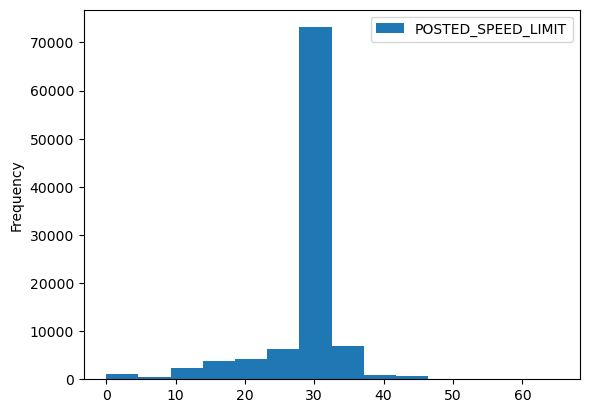

In [11]:
df[df['POSTED_SPEED_LIMIT'] < 66]['POSTED_SPEED_LIMIT'].plot.hist(bins=14, legend=True)

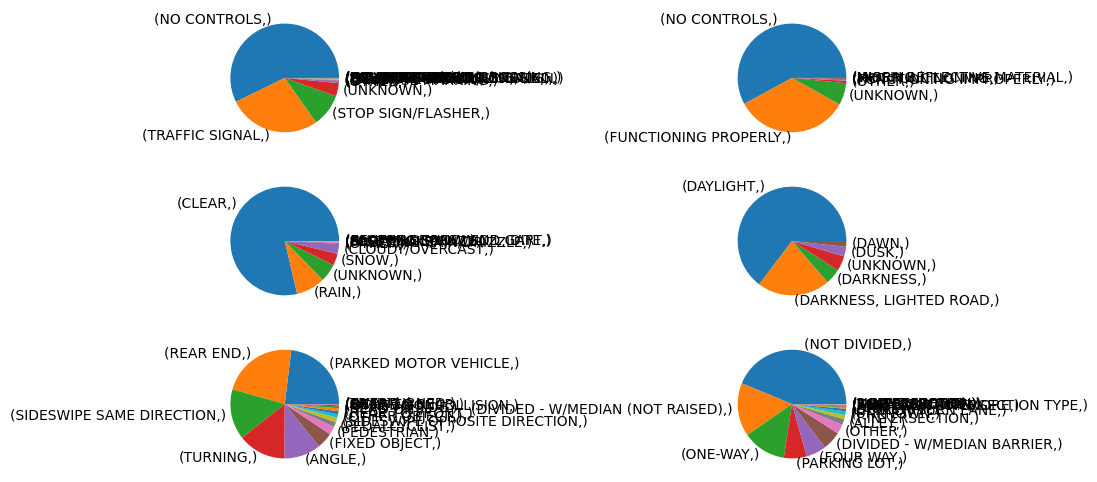

In [12]:
# let's make all of our ugly pie charts at once
from matplotlib.pyplot import subplots
pie_columns = [ 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE' , 'TRAFFICWAY_TYPE'	]

fig, ax = subplots(3, 2, figsize=(12, 6))
for index, axis in enumerate(ax.flatten()):
    df[[pie_columns[index]]].value_counts().plot(kind='pie', ax=axis, )

<Axes: >

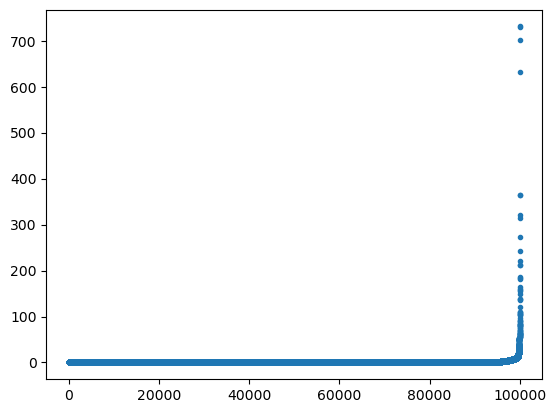

In [13]:
# most of the time the time between the crash and the time it is reported is negligible
df['delay'] = (df['DATE_POLICE_NOTIFIED'] - df['CRASH_DATE']).dt.days
df[['delay']].sort_values(by='delay').reset_index()['delay'].plot(kind='line', linestyle='none', marker='.')

<Axes: xlabel='CRASH_DAY_OF_WEEK,CRASH_HOUR'>

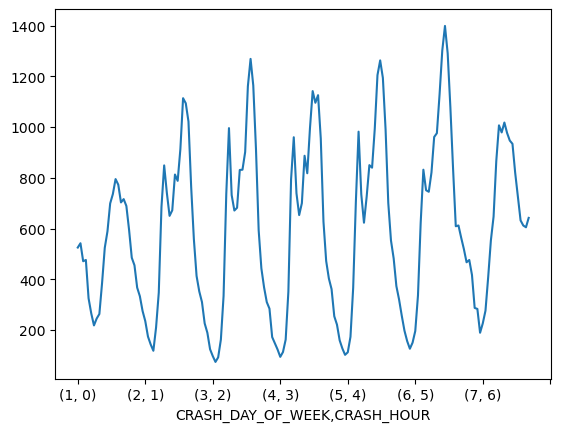

In [14]:
# day and hour chart
time_columns = ['CRASH_DAY_OF_WEEK', 'CRASH_HOUR'] 
df.groupby(by=time_columns).size().plot()

As expected crashes have rush hour modes during the week. Maybe a heatmap would be better.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='CRASH_HOUR', ylabel='CRASH_DAY_OF_WEEK'>

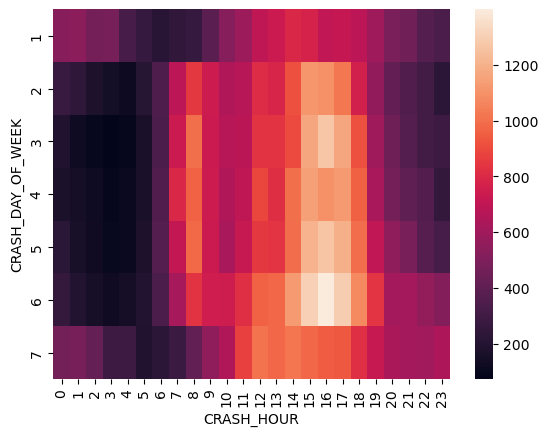

In [15]:
from seaborn import heatmap
heatmap(df.groupby(by=time_columns).size().to_frame().reset_index().pivot(columns=time_columns[1],index=time_columns[0],values=0))